In [ ]:
%matplotlib widget
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import tdt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import xarray as xr

import kd_analysis.main.kd_utils as kd
import kd_analysis.main.kd_plotting as kp
import kd_analysis.main.kd_hypno as kh
import kd_analysis.main.kd_pandas as kpd
import kd_analysis.ACR.acr_utils as acu
import sleep_score_for_me.v4 as ssfm

bp_def = dict(delta1=(0.75, 1.75), delta2=(2.5, 3.5), delta=(0.75, 4), theta=(4, 8), alpha = (8, 13), sigma = (11, 16), beta = (13, 30), low_gamma = (30, 55), high_gamma = (65, 90))

kd_ref = {}
kd_ref['echans'] = [1,2]
kd_ref['fchans']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
kd_ref['analysis_root'] = Path('/Volumes/opto_loc/Data/ACR_PROJECT_MATERIALS/ACR_9/analysis-data')
kd_ref['tank_root'] = Path('/Volumes/opto_loc/Data/ACHR_3/ACHR_3_TANK')

import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"

acr9_info = {}
acr9_info['subject'] = 'ACR_9'
acr9_info['complete_key_list'] = ['control1', 'laser1']

In [ ]:
acr_root = '/Volumes/opto_loc/Data/'

In [ ]:
path = acr_root + 'ACR_10/ACR_10-laser1'
d = tdt.read_block(path, evtype=['epocs'])

In [2]:
bp = Path('/Volumes/opto_loc/Data/ACR_12/ACR_12-mon1')
eeg = kd.get_data(bp, store='EEGr', t1=0, t2=80000, channel=[1,2])

read from t=0s to t=82035.24s
Using 1017.2526 Hz as SEV sampling rate for EEGr


In [3]:
emg = kd.get_data(bp, store='EMGr', t1=0, t2=80000, channel=[1,2], sel_chan=1)

read from t=0s to t=82035.24s
Using 1017.2526 Hz as SEV sampling rate for EMGr


In [ ]:
hypno, fig = ssfm.ssfm_v4(eeg, emg, 1)

In [73]:
min = eeg.datetime.values.min()
max = eeg.datetime.values.max()
total_days = np.arange(min.astype('datetime64[D]'), max.astype('datetime64[D]'), np.timedelta64(1, 'D'))

In [77]:
total_days = np.arange(min.astype('datetime64[D]'), max.astype('datetime64[D]')+np.timedelta64(1, 'D'), np.timedelta64(1, 'D'))
"Date range: " + str(min.astype('datetime64[m]')) + " to " + str(max.astype('datetime64[m]'))

'Date range: 2022-08-05T14:28 to 2022-08-06T12:41'

In [87]:
eeg.sel(datetime=slice(total_days[1], total_days[1] + np.timedelta64(24, 'h'))).datetime

<xarray.DataArray 'datetime' (datetime: 46500652)>
array(['2022-08-06T00:00:00.000976142', '2022-08-06T00:00:00.001959182',
       '2022-08-06T00:00:00.002942222', ..., '2022-08-06T12:41:51.998032920',
       '2022-08-06T12:41:51.999015960', '2022-08-06T12:41:51.999999000'],
      dtype='datetime64[ns]')
Coordinates:
    time       (datetime) float64 3.429e+04 3.429e+04 3.429e+04 ... 8e+04 8e+04
    timedelta  (datetime) timedelta64[ns] 09:31:28.000977142 ... 22:13:20
  * datetime   (datetime) datetime64[ns] 2022-08-06T00:00:00.000976142 ... 20...

In [89]:
t1 = total_days[1]
t2 = total_days[1] + np.timedelta64(24, 'h')

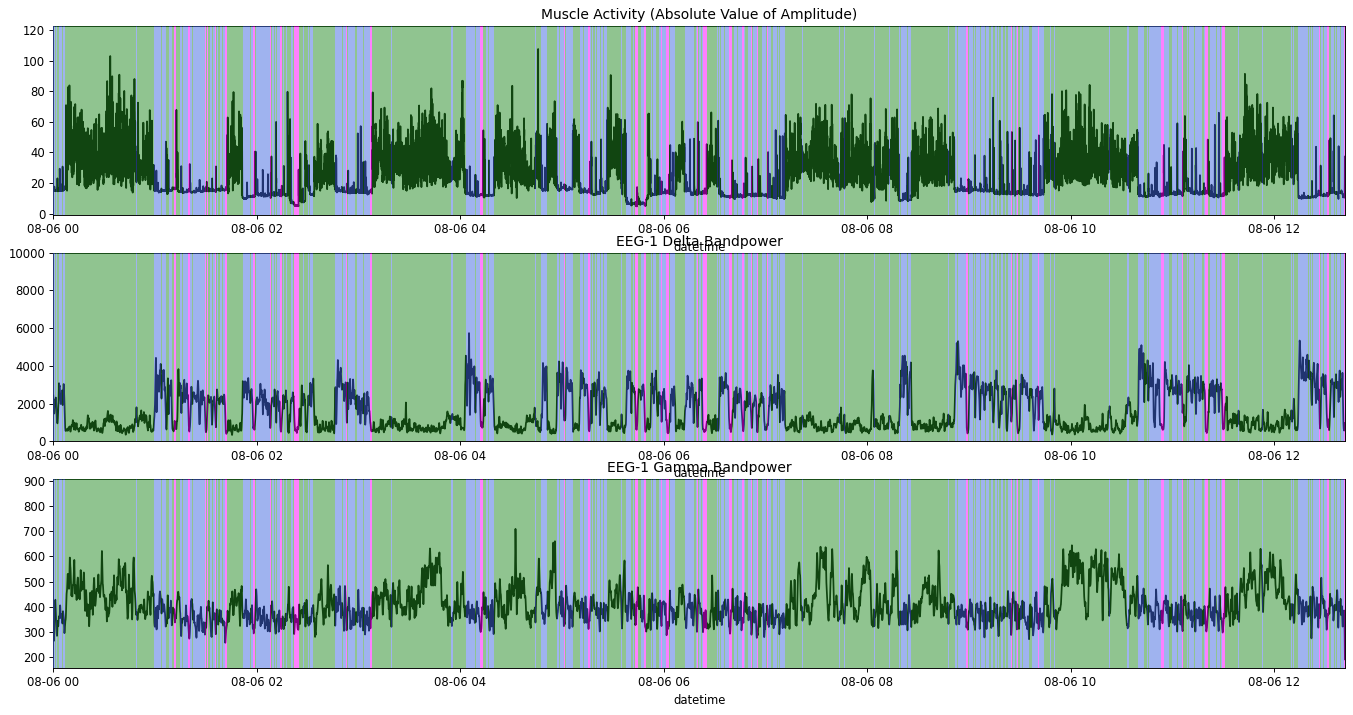

In [91]:
fig.axes[0].set_xlim(t1, max)
fig.axes[1].set_xlim(t1, max)
fig.axes[2].set_xlim(t1, max)
fig

In [ ]:
#get only the data/hypnogram from that day: 
day_range = slice(day, day+np.timedelta64(1, 'D'))
eeg_day = eeg.sel(datetime=day_range, channel=eeg_chan)

hypno_min = pd.Timestamp(min.astype('datetime64[D]'))
hypno_max = hypno_min + pd.Timedelta(days=1)
hypno_day = hypno[(hypno.end_time >= hypno_min) & (hypno.end_time < hypno_max)]

#plot the data and hypnogram
spg = kd.get_spextrogram(eeg_day)

In [ ]:
@st.cache(allow_output_mutation=True)
def cache_ssfm(h, f):
    return h, f

hypno, fig = cache_ssfm(hypno, fig)

In [93]:
import ipywidgets as widgets

In [104]:
subject = widgets.Text(value='')
block_id = widgets.Text(value='')

In [110]:
eeg_chan = widgets.IntText(
    value=1,
    description='Any:',
    disabled=False
)

In [105]:
subject

Text(value='')

In [106]:
block_id

Text(value='')

In [107]:
block_path  = Path('/Volumes/opto_loc/Data/' + subject.value + '/' + subject.value + '-' + block_id.value)

In [109]:
def load_scoring_data(emg_chan=1):
    eeg = kd.get_data(block_path, store='EEGr', channel=[1,2])
    emg = kd.get_data(block_path, store='EMGr', channel = [1,2], sel_chan=emg_chan)
    return eeg, emg

eeg, emg = load_scoring_data()

read from t=0s to t=258011.91s
Using 1017.2526 Hz as SEV sampling rate for EEGr
read from t=0s to t=258011.91s
Using 1017.2526 Hz as SEV sampling rate for EMGr


In [111]:
eeg_chan

IntText(value=1, description='Any:')

In [ ]:
def ss(eeg, emg, chan=eeg_chan.value):
    return ssfm.ssfm_v4(eeg, emg, chan)

hypno, fig = ss(eeg, emg)

In [113]:
min = eeg.datetime.values.min()
max = eeg.datetime.values.max()
total_days = np.arange(min.astype('datetime64[D]'), max.astype('datetime64[D]')+ np.timedelta64(1, 'D'), np.timedelta64(1, 'D'))
"Range of all loaded data: " + str(min.astype('datetime64[m]')) + "   to   " + str(max.astype('datetime64[m]'))

'Range of all loaded data: 2022-08-05T14:28 to 2022-08-08T14:08'

In [115]:
day = widgets.Dropdown(
    options=total_days,
    value=total_days[0],
    description='Day:',
    disabled=False,
)
day

Dropdown(description='Day:', options=(numpy.datetime64('2022-08-05'), numpy.datetime64('2022-08-06'), numpy.da…

In [118]:
def trim_fig(days, fig):
    day = widgets.Dropdown(
    options=days,
    value=total_days[0],
    description='Day:',
    disabled=False,
    )
    day
    dy = day.value
    fig.axes[0].set_xlim(dy, dy + np.timedelta64(24, 'h'))
    fig.axes[1].set_xlim(dy, dy + np.timedelta64(24, 'h'))
    fig.axes[2].set_xlim(dy, dy + np.timedelta64(24, 'h'))
    return fig

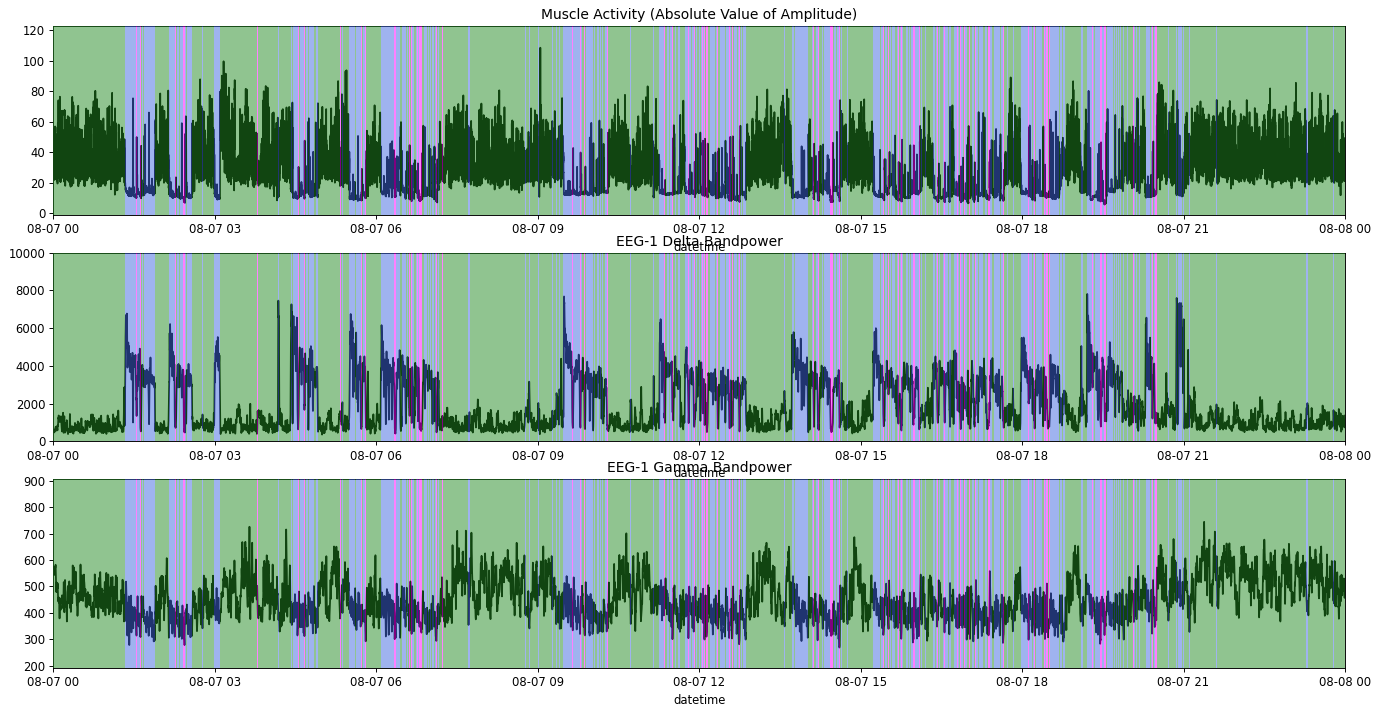

In [117]:
trim_start = day.value
trim_end = day.value + np.timedelta64(24, 'h')

trim_start = min if trim_start < min else trim_start
trim_end = max if trim_end > max else trim_end

fig.axes[0].set_xlim(trim_start, trim_end);
fig.axes[1].set_xlim(trim_start, trim_end);
fig.axes[2].set_xlim(trim_start, trim_end);
fig